# Visualizing Heteroscedasticity in Data
-------------
---------

## Importing libraries:
--------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading Data-

In [3]:
data=pd.read_csv('bottle.csv')


C:\Users\abhij\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(864863, 74)

In [5]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

------
- For our problem, **['T_degC' , 'Salnty']** are the required columns. We will be playing with these two columns here.

In [7]:
dataset=data[['T_degC','Salnty']]

In [8]:
dataset

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  853900 non-null  float64
 1   Salnty  817509 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [10]:
corr_matrix=dataset.corr()

In [11]:
corr_matrix

,T_degC,Salnty
T_degC,1.000000,-0.505266
Salnty,-0.505266,1.000000


In [12]:
corr_matrix=data.corr()

--------
- Creating a DataFrame named **S**, which will store the values of correlation coefficients for **Salnty** with other variables.
-------

In [13]:
S=corr_matrix['Salnty'].sort_values(ascending=False)

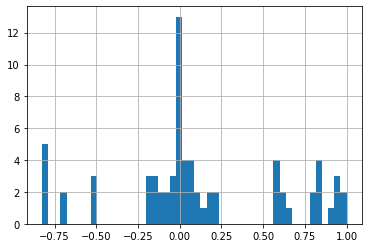

In [14]:
S.hist(bins=50)

- From above plot, we can see that *some correlation coefficients are positive while some are negative.*
----------



In [228]:
S=pd.DataFrame(S)

In [229]:
S['positive_corr']= S['Salnty'] > 0.5
S['negative_corr']= S['Salnty'] <-0.5

In [230]:
S

,Salnty,positive_corr,negative_corr
Salnty,1.000000,True,False
R_SALINITY,0.997428,True,False
DIC2,0.955942,True,False
DIC1,0.938153,True,False
TA2,0.937147,True,False
...,...,...,...
O2Sat,-0.790231,False,True
R_O2Sat,-0.790542,False,True
O2ml_L,-0.823870,False,True
R_O2,-0.823871,False,True


In [231]:
S['positive_corr'].value_counts()

False    51
True     19
Name: positive_corr, dtype: int64

In [232]:
S['negative_corr'].value_counts()

False    60
True     10
Name: negative_corr, dtype: int64

In [233]:
S

,Salnty,positive_corr,negative_corr
Salnty,1.000000,True,False
R_SALINITY,0.997428,True,False
DIC2,0.955942,True,False
DIC1,0.938153,True,False
TA2,0.937147,True,False
...,...,...,...
O2Sat,-0.790231,False,True
R_O2Sat,-0.790542,False,True
O2ml_L,-0.823870,False,True
R_O2,-0.823871,False,True


In [234]:
k=S

In [235]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Salnty to Oxy_µmol/Kg
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Salnty         70 non-null     float64
 1   positive_corr  70 non-null     bool   
 2   negative_corr  70 non-null     bool   
dtypes: bool(2), float64(1)
memory usage: 3.7+ KB


In [236]:
k

,Salnty,positive_corr,negative_corr
Salnty,1.000000,True,False
R_SALINITY,0.997428,True,False
DIC2,0.955942,True,False
DIC1,0.938153,True,False
TA2,0.937147,True,False
...,...,...,...
O2Sat,-0.790231,False,True
R_O2Sat,-0.790542,False,True
O2ml_L,-0.823870,False,True
R_O2,-0.823871,False,True


In [237]:
x=[]
y=[]
for i in range(70):
    if k['Salnty'][i]> 0.5 or k['Salnty'][i]< -0.5:
        x.append(i)
        y.append(k['Salnty'][i])
    

In [238]:
x=[k.index[i] for i in x]

In [239]:
x1=[i for i in range(len(x))]

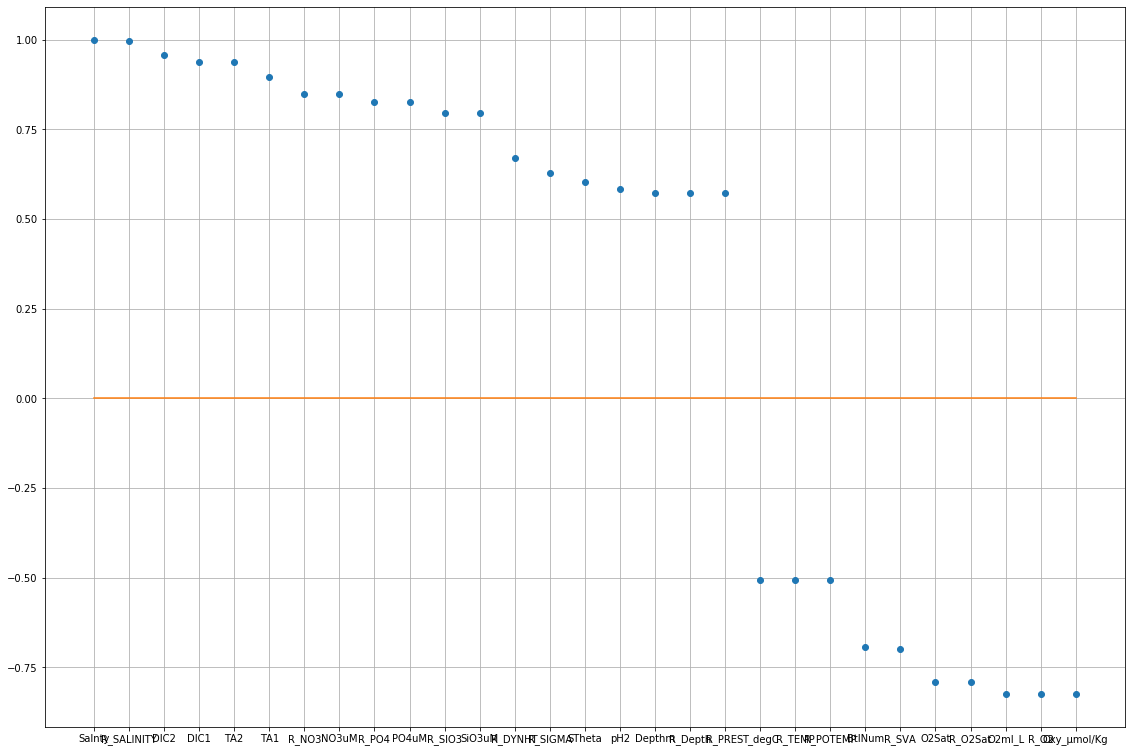

In [240]:
fig= plt.figure(figsize=(15,10))
ax=fig.add_axes([-1,-1,1,1])
l1=ax.plot(x1,y,'o')
l2=ax.plot(x1,[0 for i in range(len(x1))])
ax.set_xticks(x1)
ax.set_xticklabels(x,)
plt.grid(True)

In [28]:
dataset=data[x]

In [29]:
dataset

,Salnty,R_SALINITY,DIC2,DIC1,TA2,TA1,R_NO3,NO3uM,R_PO4,PO4uM,...,T_degC,R_TEMP,R_POTEMP,BtlNum,R_SVA,O2Sat,R_O2Sat,O2ml_L,R_O2,Oxy_µmol/Kg
0,33.4400,33.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.500,10.50,10.50,NaN,233.0,NaN,NaN,NaN,NaN,NaN
1,33.4400,33.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.460,10.46,10.46,NaN,232.5,NaN,NaN,NaN,NaN,NaN
2,33.4370,33.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.460,10.46,10.46,NaN,232.8,NaN,NaN,NaN,NaN,NaN
3,33.4200,33.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.450,10.45,10.45,NaN,234.1,NaN,NaN,NaN,NaN,NaN
4,33.4210,33.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.450,10.45,10.45,NaN,234.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,33.4083,33.408,NaN,NaN,NaN,NaN,0.1,0.10,0.22,0.22,...,18.744,18.74,18.74,NaN,402.4,108.74,108.7,5.805,5.81,253.47
864859,33.4083,33.408,NaN,NaN,NaN,NaN,0.1,0.10,0.22,0.22,...,18.744,18.74,18.74,4.0,402.5,108.74,108.7,5.805,5.81,253.47
864860,33.4150,33.415,NaN,NaN,NaN,NaN,0.1,0.09,0.20,0.20,...,18.692,18.69,18.69,3.0,400.8,108.46,108.5,5.796,5.80,253.06
864861,33.4062,33.406,NaN,NaN,NaN,NaN,0.1,0.11,0.25,0.25,...,18.161,18.16,18.16,2.0,389.1,107.74,107.7,5.816,5.82,253.92


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Salnty       817509 non-null  float64
 1   R_SALINITY   817509 non-null  float64
 2   DIC2         224 non-null     float64
 3   DIC1         1999 non-null    float64
 4   TA2          234 non-null     float64
 5   TA1          2084 non-null    float64
 6   R_NO3        337411 non-null  float64
 7   NO3uM        337403 non-null  float64
 8   R_PO4        413325 non-null  float64
 9   PO4uM        413317 non-null  float64
 10  R_SIO3       354099 non-null  float64
 11  SiO3uM       354091 non-null  float64
 12  R_DYNHT      818206 non-null  float64
 13  R_SIGMA      812007 non-null  float64
 14  STheta       812174 non-null  float64
 15  pH2          10 non-null      float64
 16  Depthm       864863 non-null  int64  
 17  R_Depth      864863 non-null  float64
 18  R_PRES       864863 non-

Now, there are some features which contains many null values;


In [31]:
k = dataset.isnull().sum()

In [32]:
k=pd.DataFrame(k)

In [33]:
mask =(k[0]<= 47354)
df=k[mask]

In [34]:
df

,0
Salnty,47354
R_SALINITY,47354
R_DYNHT,46657
Depthm,0
R_Depth,0
R_PRES,0
T_degC,10963
R_TEMP,10963
R_POTEMP,46047


In [35]:
dataset

,Salnty,R_SALINITY,DIC2,DIC1,TA2,TA1,R_NO3,NO3uM,R_PO4,PO4uM,...,T_degC,R_TEMP,R_POTEMP,BtlNum,R_SVA,O2Sat,R_O2Sat,O2ml_L,R_O2,Oxy_µmol/Kg
0,33.4400,33.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.500,10.50,10.50,NaN,233.0,NaN,NaN,NaN,NaN,NaN
1,33.4400,33.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.460,10.46,10.46,NaN,232.5,NaN,NaN,NaN,NaN,NaN
2,33.4370,33.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.460,10.46,10.46,NaN,232.8,NaN,NaN,NaN,NaN,NaN
3,33.4200,33.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.450,10.45,10.45,NaN,234.1,NaN,NaN,NaN,NaN,NaN
4,33.4210,33.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.450,10.45,10.45,NaN,234.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,33.4083,33.408,NaN,NaN,NaN,NaN,0.1,0.10,0.22,0.22,...,18.744,18.74,18.74,NaN,402.4,108.74,108.7,5.805,5.81,253.47
864859,33.4083,33.408,NaN,NaN,NaN,NaN,0.1,0.10,0.22,0.22,...,18.744,18.74,18.74,4.0,402.5,108.74,108.7,5.805,5.81,253.47
864860,33.4150,33.415,NaN,NaN,NaN,NaN,0.1,0.09,0.20,0.20,...,18.692,18.69,18.69,3.0,400.8,108.46,108.5,5.796,5.80,253.06
864861,33.4062,33.406,NaN,NaN,NaN,NaN,0.1,0.11,0.25,0.25,...,18.161,18.16,18.16,2.0,389.1,107.74,107.7,5.816,5.82,253.92


In [36]:
data=dataset[df.index]

In [37]:
data

,Salnty,R_SALINITY,R_DYNHT,Depthm,R_Depth,R_PRES,T_degC,R_TEMP,R_POTEMP
0,33.4400,33.440,0.000,0,0.0,0,10.500,10.50,10.50
1,33.4400,33.440,0.010,8,8.0,8,10.460,10.46,10.46
2,33.4370,33.437,0.020,10,10.0,10,10.460,10.46,10.46
3,33.4200,33.420,0.040,19,19.0,19,10.450,10.45,10.45
4,33.4210,33.421,0.040,20,20.0,20,10.450,10.45,10.45
...,...,...,...,...,...,...,...,...,...
864858,33.4083,33.408,0.000,0,0.0,0,18.744,18.74,18.74
864859,33.4083,33.408,0.008,2,2.0,2,18.744,18.74,18.74
864860,33.4150,33.415,0.020,5,5.0,5,18.692,18.69,18.69
864861,33.4062,33.406,0.040,10,10.0,10,18.161,18.16,18.16


In [38]:
data

,Salnty,R_SALINITY,R_DYNHT,Depthm,R_Depth,R_PRES,T_degC,R_TEMP,R_POTEMP
0,33.4400,33.440,0.000,0,0.0,0,10.500,10.50,10.50
1,33.4400,33.440,0.010,8,8.0,8,10.460,10.46,10.46
2,33.4370,33.437,0.020,10,10.0,10,10.460,10.46,10.46
3,33.4200,33.420,0.040,19,19.0,19,10.450,10.45,10.45
4,33.4210,33.421,0.040,20,20.0,20,10.450,10.45,10.45
...,...,...,...,...,...,...,...,...,...
864858,33.4083,33.408,0.000,0,0.0,0,18.744,18.74,18.74
864859,33.4083,33.408,0.008,2,2.0,2,18.744,18.74,18.74
864860,33.4150,33.415,0.020,5,5.0,5,18.692,18.69,18.69
864861,33.4062,33.406,0.040,10,10.0,10,18.161,18.16,18.16


In [39]:
import mglearn

In [40]:
corr_matrix=data.corr()

In [41]:
corr_matrix

,Salnty,R_SALINITY,R_DYNHT,Depthm,R_Depth,R_PRES,T_degC,R_TEMP,R_POTEMP
Salnty,1.000000,0.997428,0.669824,0.572630,0.572629,0.571405,-0.505266,-0.505268,-0.507023
R_SALINITY,0.997428,1.000000,0.669828,0.571185,0.571184,0.569962,-0.503959,-0.503961,-0.507020
R_DYNHT,0.669824,0.669828,1.000000,0.927118,0.927118,0.926071,-0.799025,-0.799025,-0.801092
Depthm,0.572630,0.571185,0.927118,1.000000,1.000000,0.999994,-0.681201,-0.681202,-0.679035
R_Depth,0.572629,0.571184,0.927118,1.000000,1.000000,0.999994,-0.681200,-0.681200,-0.679033
R_PRES,0.571405,0.569962,0.926071,0.999994,0.999994,1.000000,-0.679852,-0.679852,-0.677652
T_degC,-0.505266,-0.503959,-0.799025,-0.681201,-0.681200,-0.679852,1.000000,1.000000,0.999954
R_TEMP,-0.505268,-0.503961,-0.799025,-0.681202,-0.681200,-0.679852,1.000000,1.000000,0.999954
R_POTEMP,-0.507023,-0.507020,-0.801092,-0.679035,-0.679033,-0.677652,0.999954,0.999954,1.000000


In [42]:
import seaborn as sns

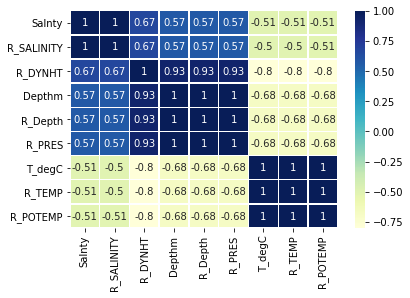

In [43]:
ax=sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='YlGnBu')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Salnty      817509 non-null  float64
 1   R_SALINITY  817509 non-null  float64
 2   R_DYNHT     818206 non-null  float64
 3   Depthm      864863 non-null  int64  
 4   R_Depth     864863 non-null  float64
 5   R_PRES      864863 non-null  int64  
 6   T_degC      853900 non-null  float64
 7   R_TEMP      853900 non-null  float64
 8   R_POTEMP    818816 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 59.4 MB


- Taking 'Salnty' and 'T_degC', only

In [45]:
df=data[['Salnty','T_degC']]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  817509 non-null  float64
 1   T_degC  853900 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [47]:
df=df.dropna()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF1AE24188>,
      dtype=object)

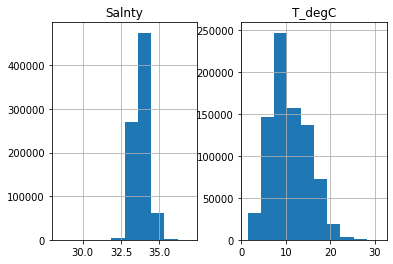

In [49]:
df.hist()

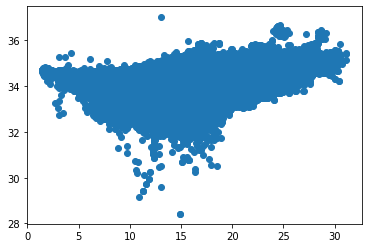

In [50]:
plt.scatter(df['T_degC'],df['Salnty'])

#### Splitting the data into train and test:

In [51]:
X=df['T_degC']
y=df['Salnty']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train , y_test= train_test_split(X,y, test_size=0.25,
                                                   random_state=42)

In [54]:
X_train.shape

(610685,)

In [55]:
X_test.shape

(203562,)

In [56]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [[-0.05522841]]
lr.intercept_: [34.44135809]


In [60]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.26
Test set score: 0.25


- Linear Model can't predict the *Salnty* based on *T_degC*

In [61]:
from sklearn.linear_model import Ridge

In [62]:
ridge= Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.26
Test set score: 0.25


- Let's us try Polynomial Features

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly=PolynomialFeatures(degree=13)

In [65]:
X_tr=poly.fit_transform(X_train)


In [66]:
lr.fit(X_tr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
X_test_tr=poly.transform(X_test)

In [68]:
print("Training set score: {:.2f}".format(lr.score(X_tr, y_train)))

print("Test set score: {:.2f}".format(lr.score(X_test_tr, y_test)))


Training set score: 0.50
Test set score: 0.50


#  By increasing the degree of curve, we achieved higher score

In [69]:
ridge= Ridge().fit(X_tr, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_tr, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_tr,y_test)))

Training set score: 0.51
Test set score: 0.51


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25319e-41): result may not be accurate.
  overwrite_a=True).T


In [70]:
ridge= Ridge(alpha=0.1).fit(X_tr, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_tr, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_tr,y_test)))

Training set score: 0.51
Test set score: 0.51


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25319e-42): result may not be accurate.
  overwrite_a=True).T


----------------

In [71]:
dataset=data[['Salnty','T_degC']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF1AE38548>,
      dtype=object)

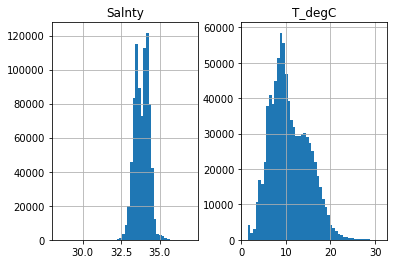

In [72]:

dataset.hist(bins=50)

In [73]:
import seaborn as sns

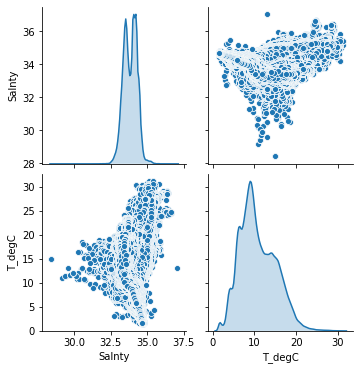

In [74]:
sns.pairplot(dataset,kind='scatter', diag_kind='kde')
plt.show()

In [75]:
corr_matrix=dataset.corr()

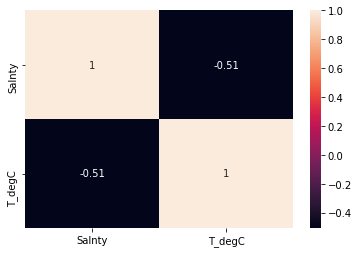

In [76]:
sns.heatmap(corr_matrix, annot=True)

In [77]:
DATASET=dataset.copy()

In [78]:
dataset2=DATASET.copy()

In [79]:
dataset2['T_degC']=np.log(DATASET['T_degC']+1)

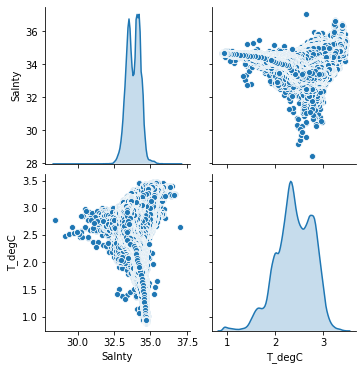

In [80]:
sns.pairplot(dataset2,kind='scatter', diag_kind='kde')
plt.show()

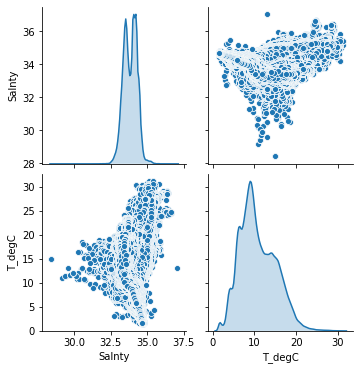

In [81]:
sns.pairplot(dataset,kind='scatter', diag_kind='kde')
plt.show()

In [82]:
dataset.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [83]:
dataset2.head()

,Salnty,T_degC
0,33.440,2.442347
1,33.440,2.438863
2,33.437,2.438863
3,33.420,2.437990
4,33.421,2.437990


In [84]:
dataset3=dataset.copy()

In [85]:
dataset3['T_degC']=np.log(dataset2['T_degC'])

In [86]:
dataset3.head()

,Salnty,T_degC
0,33.440,0.892959
1,33.440,0.891532
2,33.437,0.891532
3,33.420,0.891174
4,33.421,0.891174


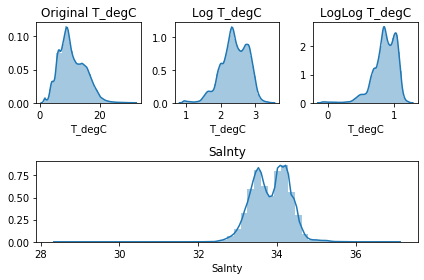

In [87]:
a1=plt.subplot2grid((2,3),(0,0),colspan=1)
a2=plt.subplot2grid((2,3),(0,1),colspan=1)
a3=plt.subplot2grid((2,3),(0,2),colspan=1)
a4=plt.subplot2grid((2,3),(1,0),colspan=3)
sns.distplot(dataset['T_degC'], ax=a1)
a1.set_title('Original T_degC')
sns.distplot(dataset2['T_degC'], ax=a2)
a2.set_title('Log T_degC')
sns.distplot(dataset3['T_degC'], ax=a3)
a3.set_title('LogLog T_degC')
sns.distplot(dataset['Salnty'], ax=a4)
a4.set_title('Salnty')
plt.tight_layout()
plt.show()

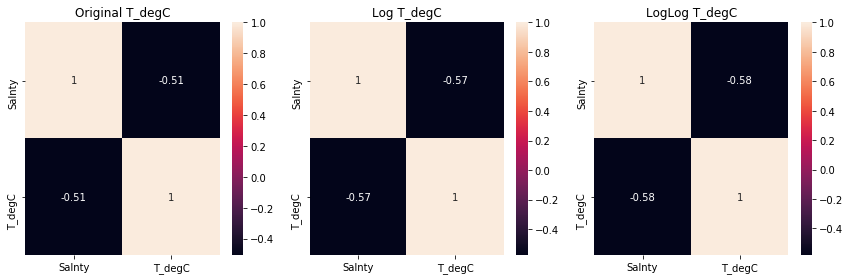

In [88]:
fig, axes= plt.subplots(1,3, figsize=(12,4))
sns.heatmap(dataset.corr(), ax=axes[0], annot=True)
axes[0].set_title('Original T_degC')
sns.heatmap(dataset2.corr(), ax=axes[1],annot=True)
axes[1].set_title('Log T_degC')
sns.heatmap(dataset3.corr(), ax=axes[2],annot=True)
axes[2].set_title('LogLog T_degC')

plt.tight_layout()
plt.show()

- Correlation has increased, between our target and feature.
- Therefore, we will use *dataset3* ; in which we have done logarithmic transformation twice

In [89]:
dataset3.head()

,Salnty,T_degC
0,33.440,0.892959
1,33.440,0.891532
2,33.437,0.891532
3,33.420,0.891174
4,33.421,0.891174


- Selecting linear model and cross validating

In [90]:
dataset3.isnull().sum()

Salnty    47354
T_degC    10963
dtype: int64

In [91]:
dataset3=dataset3.sort_values(by='T_degC')

In [92]:
dataset3=dataset3.fillna(method='ffill', axis=0)

In [93]:
dataset3.isnull().sum()

Salnty    0
T_degC    0
dtype: int64

In [94]:
X=dataset3['T_degC']
y=dataset3['Salnty']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=42)

In [98]:
print("Train set size: {}\nTest set size: {}".format(X_train.shape,X_test.shape))

Train set size: (648647, 1)
Test set size: (216216, 1)


In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=5)

In [102]:
print("Cross-Validation scores: \n{}".format(cross_val_score(lr, X_train,
                                                            y_train,
                                                            cv=kfold)))

Cross-Validation scores: 
[0.32390743 0.3245102  0.33042474 0.33268895 0.32906622]


- Trying Polynomial Model

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
poly=PolynomialFeatures(degree=11)

In [105]:
X_train_tr=poly.fit_transform(X_train)

In [106]:

print("Cross-Validation scores: \n{}".format(cross_val_score(lr, X_train_tr,
                                                            y_train,
                                                            cv=kfold)))
scores=cross_val_score(lr, X_train_tr, y_train, cv=kfold)
print("\nScore: ",(np.mean(scores)))

Cross-Validation scores: 
[0.50200344 0.49905953 0.50450738 0.50424128 0.5033863 ]

Score:  0.5026395863580821


----------------------------
--------------------------

- Trying Polynomial Model

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
poly=PolynomialFeatures(degree=11)

In [109]:
X_train.shape

(648647, 1)

In [110]:
X_train_tr=poly.fit_transform(X_train)

In [111]:
y_train.shape

(648647, 1)

In [112]:
lr=LinearRegression()

In [113]:
lr.fit(X_train_tr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
pred=lr.predict(X_train_tr)

In [115]:
pred.shape

(648647, 1)

In [116]:
X_train_tr[:5]

array([[1.        , 1.03318624, 1.0674738 , 1.10289923, 1.13950031,
        1.17731603, 1.21638672, 1.25675402, 1.29846095, 1.34155198,
        1.38607304, 1.43207159],
       [1.        , 0.77586772, 0.60197072, 0.46704965, 0.36236874,
        0.28115021, 0.21813537, 0.16924419, 0.13131111, 0.10188005,
        0.07904544, 0.06132881],
       [1.        , 0.82477239, 0.6802495 , 0.56105101, 0.46273939,
        0.38165467, 0.31477824, 0.2596204 , 0.21412774, 0.17660665,
        0.14566029, 0.12013659],
       [1.        , 0.84595421, 0.71563853, 0.60539743, 0.5121385 ,
        0.43324573, 0.36650605, 0.31004733, 0.26228585, 0.22188182,
        0.18770186, 0.15878718],
       [1.        , 0.89825147, 0.8068557 , 0.72475932, 0.65101613,
        0.58477619, 0.52527608, 0.47183001, 0.423822  , 0.38069873,
        0.3419632 , 0.30716894]])

In [117]:
X_train[:5]

array([[1.03318624],
       [0.77586772],
       [0.82477239],
       [0.84595421],
       [0.89825147]])

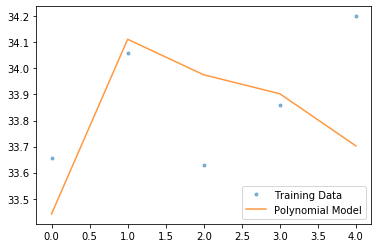

In [118]:
plt.plot(y_train[:5],'.', label='Training Data', alpha=0.5)
plt.plot( pred[:5],label='Polynomial Model', alpha=0.8)
plt.legend(loc='best')

In [119]:
y_train[:1000].min()

31.75

In [120]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [121]:
print("MSE: {:.2f}".format(mean_squared_error(y_train[:5],pred[:5])))

MSE: 0.08


In [122]:
print("R2 Score : {:.2f}".format(r2_score(y_train[:5],pred[:5])))

R2 Score : -0.69


In [123]:
y_train[:5]

array([[33.656],
       [34.059],
       [33.63 ],
       [33.86 ],
       [34.2  ]])

In [124]:
pred[:5]

array([[33.44173733],
       [34.11166943],
       [33.97539926],
       [33.90269682],
       [33.7025723 ]])

--------------

In [125]:
dataset

,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [126]:
X1=dataset['T_degC']
y1=dataset['Salnty']

In [127]:
X1.isnull().sum()

10963

In [128]:
y1.isnull().sum()

47354

In [129]:
X1=np.array(X1).reshape(-1,1)
y1=np.array(y1).reshape(-1,1)

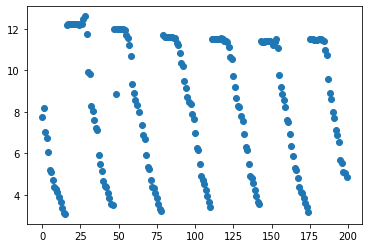

In [130]:
plt.plot(X1[200:400],'o', label='Training points')

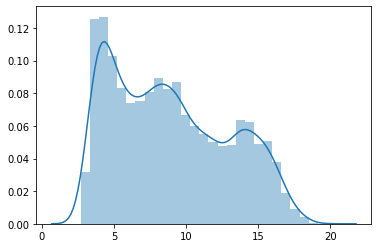

In [131]:
sns.distplot(X1[:10000])

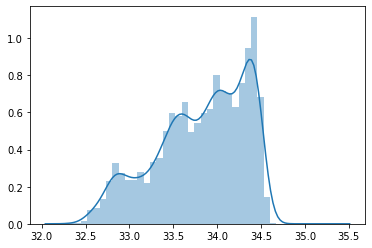

In [132]:
sns.distplot(y1[:10000])

In [133]:
sample_features=pd.DataFrame(X1[:10000])
sample_label=pd.DataFrame(y1[:10000])

In [134]:
sample_features.isnull().sum()

0    44
dtype: int64

In [135]:
sample_label.isnull().sum()

0    242
dtype: int64

In [136]:
sample=pd.DataFrame(sample_features)

In [137]:
sample['Salnty']=sample_label

In [138]:
sample=sample.rename(columns={0:'T_degC'})

In [139]:
sample.columns

Index(['T_degC', 'Salnty'], dtype='object')

In [140]:
sample.corr()

,T_degC,Salnty
T_degC,1.000000,-0.651566
Salnty,-0.651566,1.000000


In [141]:
sample.isnull().sum()

T_degC     44
Salnty    242
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF1BD0D2C8>,
      dtype=object)

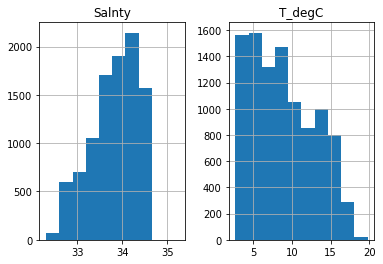

In [142]:
sample.hist()

In [143]:
from sklearn.impute import SimpleImputer

In [144]:
imputer=SimpleImputer(strategy='median')

In [145]:
imputer.fit(sample)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [146]:
imputer.statistics_

array([ 8.4   , 33.9075])

In [147]:
sample2=imputer.transform(sample)

In [148]:
np.median(sample2,axis=0)

array([ 8.4   , 33.9075])

In [149]:
sample2=pd.DataFrame(sample2,columns=sample.columns, index=sample.index)

In [150]:
sample2

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
9995,15.71,33.640
9996,15.35,33.621
9997,14.64,33.510
9998,14.04,33.459


In [151]:
sample2.isnull().sum()

T_degC    0
Salnty    0
dtype: int64

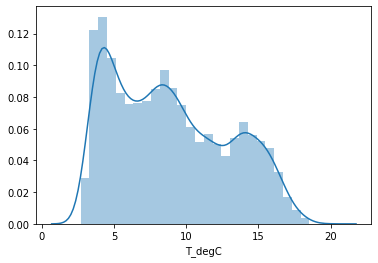

In [152]:
sns.distplot(sample2['T_degC'])

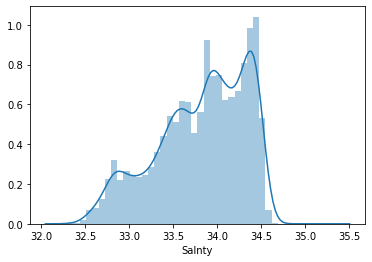

In [153]:
sns.distplot(sample2['Salnty'])

- Let's try to fit Linear model

In [154]:
sample_features=sample2['Salnty']
sample_label=sample2['T_degC']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test, y_train, y_test =train_test_split(sample_features, 
                                                 sample_label, test_size=0.2,
                                                 random_state=42)

In [157]:
X_train.shape

(8000,)

In [158]:
X_test.shape

(2000,)

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lr=LinearRegression()

In [161]:
a=[X_train,X_test, y_train, y_test]

In [162]:
X_train=X_train.values

In [163]:
X_train=X_train.reshape(-1,1)

In [164]:
X_test=np.array(X_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [165]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
scores=cross_val_score(lr, X_train,  y_train, cv=5)

In [167]:
print("scores: ", scores.mean())

scores:  0.4083235147960478


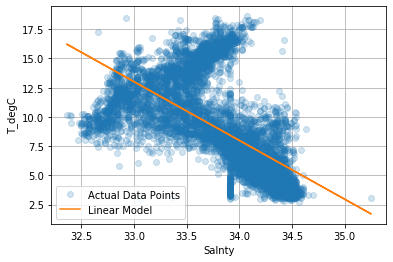

In [168]:
plt.plot(X_train, y_train,'o', label='Actual Data Points', alpha=0.2)
plt.plot(X_train, lr.predict(X_train), label='Linear Model')
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.grid(True)
plt.legend(loc='best')

- Let us try to plot the Polynomial Model

In [169]:
from sklearn.preprocessing import PolynomialFeatures

In [170]:
poly=PolynomialFeatures()

In [171]:
degree=[1,5,10,20,100]

In [172]:
poly=PolynomialFeatures(degree=5)

In [173]:
X_train_tr=poly.fit_transform(X_train)

In [174]:
X_train_tr.shape

(8000, 6)

In [175]:
y_train.shape

(8000, 1)

In [176]:
lr.fit(X_train_tr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
pred=lr.predict(X_train_tr)

Deg 5 cv scores: 0.55109
Accuracy: 0.59
Deg 6 cv scores: 0.55095
Accuracy: 0.59
Deg 7 cv scores: 0.55091
Accuracy: 0.59
Deg 8 cv scores: 0.55100
Accuracy: 0.59
Deg 9 cv scores: 0.55122
Accuracy: 0.59


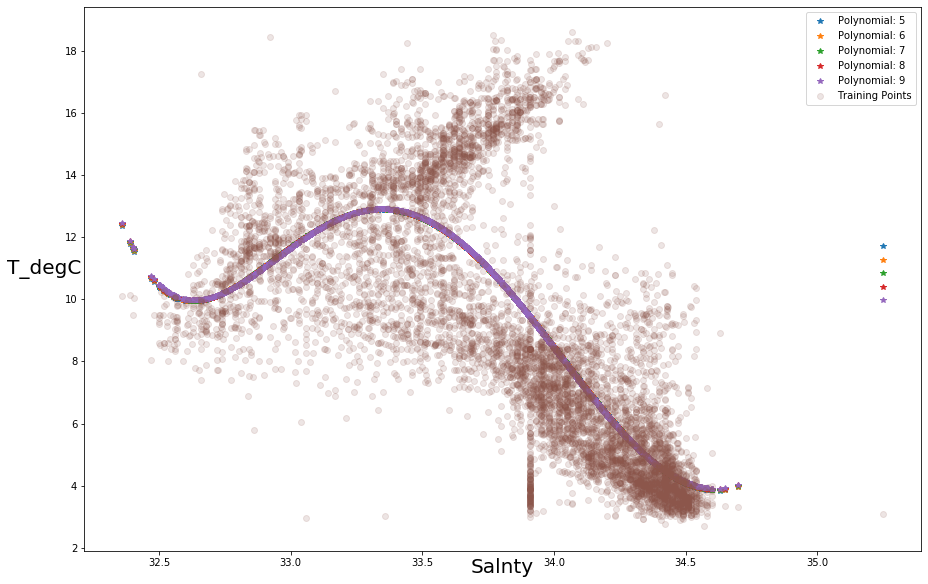

In [178]:
%matplotlib inline
plt.figure(figsize=(15,10))


for deg in range(5,10):
    poly=PolynomialFeatures(degree=deg)
    lr=LinearRegression()
    X_train_tr=poly.fit_transform(X_train)
    lr.fit(X_train_tr,y_train)
    scores=cross_val_score(lr, X_train_tr,  y_train, cv=5)
    print("Deg {} cv scores: {:.5f}".format(deg,scores.mean()))
    print("Accuracy: {:.2f}".format(lr.score(X_train_tr,y_train)))
    
    plt.plot(X_train, lr.predict(X_train_tr),'*', label='Polynomial: {}'.format(str(deg)))
    

    
plt.plot(X_train, y_train,'o',label='Training Points', alpha=0.15)
plt.xlabel("Salnty", fontsize=20,labelpad=-10)
plt.ylabel("T_degC",rotation=False,fontsize=20,labelpad=20)
plt.legend(loc='best', fontsize=10)

- This is the best linear polynomial model to our knowledge .

-------------
- The above models were trained without any feature transformation.
------------


### Let's Try to fit the LinearSVR model:

In [179]:
sample

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
9995,15.71,33.640
9996,15.35,33.621
9997,14.64,33.510
9998,14.04,33.459


- Our target feature is : "T_degC"
- Our predicting feature is : "Salnty"

-------------------
##### Let us try to fit our LinearSVR model.

In [180]:
sample.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [181]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_degC  9956 non-null   float64
 1   Salnty  9758 non-null   float64
dtypes: float64(2)
memory usage: 156.4 KB


In [182]:
sample.isnull().sum()

T_degC     44
Salnty    242
dtype: int64

In [183]:
from sklearn.impute import SimpleImputer

In [184]:
imputer=SimpleImputer(strategy='median')

In [185]:
s=imputer.fit_transform(sample)

In [186]:
sample_tr=pd.DataFrame(s, columns=sample.columns,
                      index=sample.index)

In [187]:
sample_tr.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(sample_tr['Salnty'],sample_tr['T_degC'],
                                                   test_size=0.25, random_state=42)

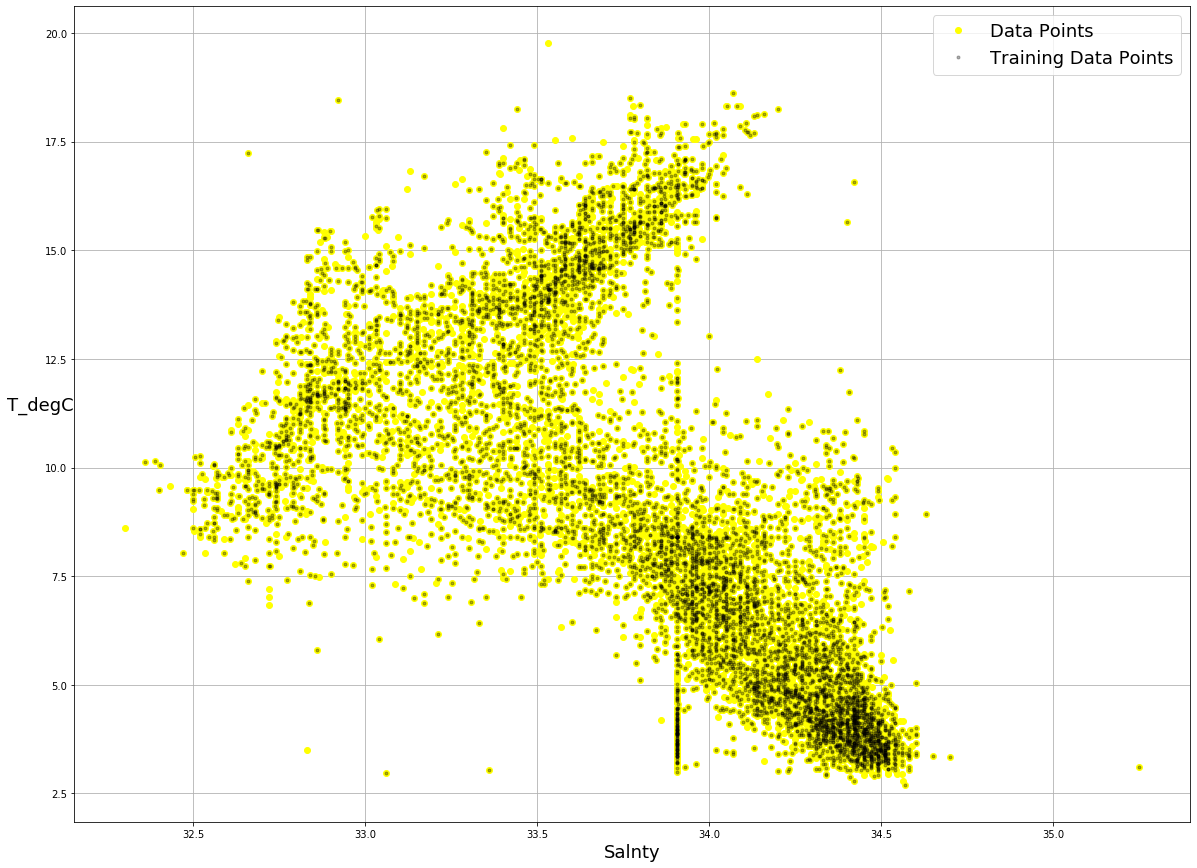

In [190]:
%matplotlib inline
plt.figure(figsize=(20,15))
plt.plot(sample_tr['Salnty'],sample_tr['T_degC'],'o',label='Data Points',
        color='yellow')
plt.plot(X_train,y_train,'.',label='Training Data Points',alpha=0.3,
        color='black')
plt.xlabel('Salnty',fontsize=18)
plt.ylabel('T_degC',fontsize=18, rotation=False)
plt.grid(True)
plt.legend(loc='best',fontsize=18)

In [191]:
X_train=np.array(X_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [192]:
from sklearn.svm import LinearSVR

In [193]:
svm_reg1 = LinearSVR(epsilon=7.5, random_state=42,max_iter=50000)
svm_reg2 = LinearSVR(epsilon=9, random_state=42, max_iter=50000)


In [194]:
svm_reg1.fit(X_train, y_train.ravel())
svm_reg2.fit(X_train, y_train.ravel())

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=9, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=50000,
          random_state=42, tol=0.0001, verbose=0)

In [195]:
def find_support_vectors(svm_reg, X, y):
    y_pred= svm_reg.predict(X)
    off_margin= (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support= find_support_vectors(svm_reg1, X_train, y_train.ravel())
svm_reg2.support= find_support_vectors(svm_reg2, X_train, y_train.ravel())

In [196]:
eps_x1 = 34
eps_x2 = 34
eps_y1_pred=svm_reg1.predict([[eps_x1]])
eps_y2_pred=svm_reg2.predict([[eps_x2]])

<IPython.core.display.Javascript object>


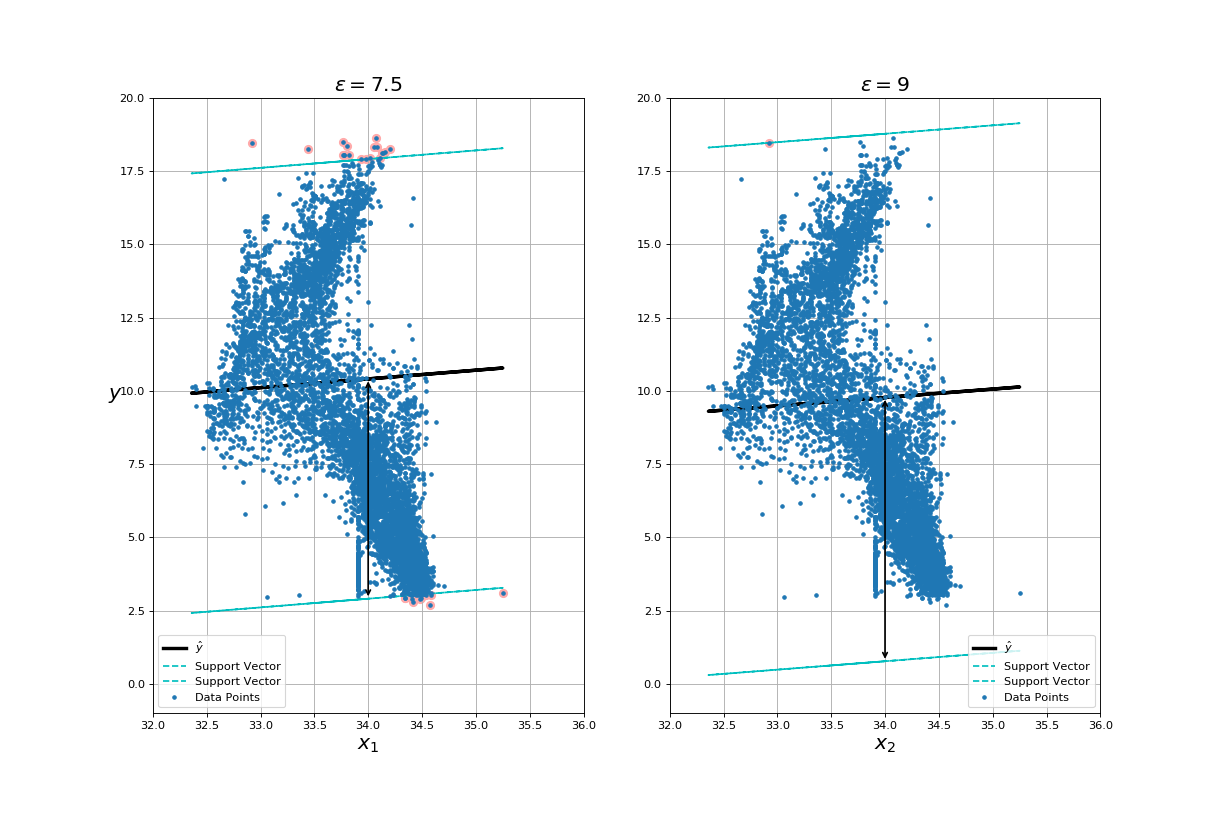

In [202]:
%matplotlib notebook
def plot_svm_regression(svm_reg, X , y, axes):
    x1s= X
    y_pred= svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=3, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "c--",label='Support Vector')
    plt.plot(x1s, y_pred - svm_reg.epsilon, "c--",label='Support Vector')
    plt.scatter(X[svm_reg.support], y[svm_reg.support],s=50,
            facecolors='#FFAAAA')
    plt.plot(X, y,'.',label='Data Points')
    
    plt.axis(axes)
    plt.grid(True)
    

plt.figure(figsize=(15,10))
plt.title("Learned Support Vector Model")


plt.subplot(121)
plot_svm_regression(svm_reg1, X_train, y_train, [32,36,-1,20])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
'', xy=(eps_x1, eps_y1_pred), xycoords='data',
xytext=(eps_x1, eps_y1_pred - svm_reg1.epsilon),
textcoords='data', arrowprops={'arrowstyle':'<->','linewidth':1.5}
)
plt.xlabel(r"$x_1$", fontsize=18)
plt.legend(loc='lower left', fontsize=10)


plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X_train, y_train, [32,36,-1,20])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.annotate(
'', xy=(eps_x2, eps_y2_pred), xycoords='data',
xytext=(eps_x2, eps_y2_pred - svm_reg2.epsilon),
textcoords='data', arrowprops={'arrowstyle':'<->','linewidth':1.5}
)
plt.xlabel(r"$x_2$", fontsize=18)
plt.legend(loc='lower right', fontsize=10)



plt.show()

<IPython.core.display.Javascript object>


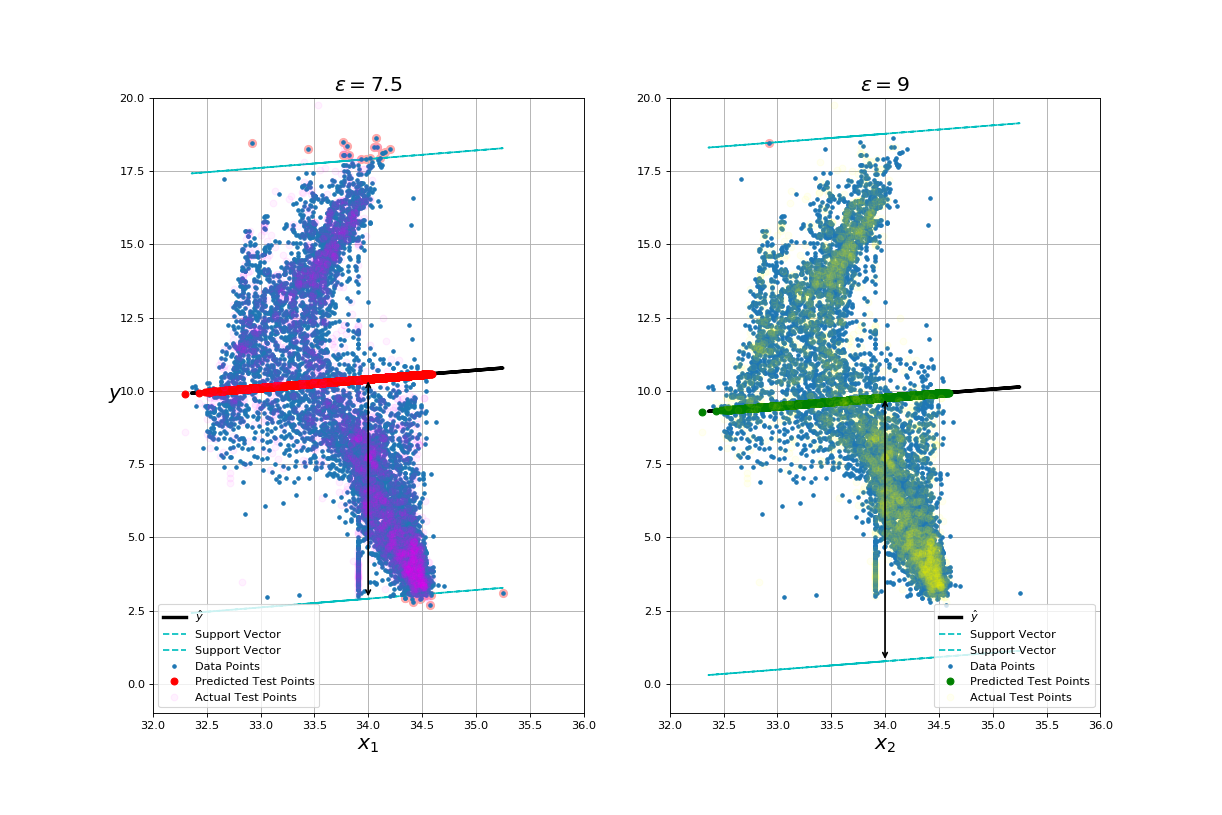

In [205]:
%matplotlib notebook
def plot_svm_regression(svm_reg, X , y, axes):
    x1s= X
    y_pred= svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=3, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "c--", label='Support Vector')
    plt.plot(x1s, y_pred - svm_reg.epsilon, "c--",label='Support Vector')
    plt.scatter(X[svm_reg.support], y[svm_reg.support],s=50,
            facecolors='#FFAAAA')
    plt.plot(X, y,'.',label='Data Points')
    plt.axis(axes)
    plt.grid(True)
    

plt.figure(figsize=(15,10))
plt.subplot(121)
plot_svm_regression(svm_reg1, X_train, y_train, [32,36,-1,20])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
'', xy=(eps_x1, eps_y1_pred), xycoords='data',
xytext=(eps_x1, eps_y1_pred - svm_reg1.epsilon),
textcoords='data', arrowprops={'arrowstyle':'<->','linewidth':1.5}
)
plt.xlabel(r"$x_1$", fontsize=18)
plt.plot(X_test, svm_reg1.predict(X_test),'o',color='red', label='Predicted Test Points')
plt.plot(X_test, y_test,'o',color='magenta',label='Actual Test Points', alpha=0.05)
plt.legend(loc='lower left', fontsize=10)

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)
plt.subplot(122)
plot_svm_regression(svm_reg2, X_train, y_train, [32,36,-1,20])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.annotate(
'', xy=(eps_x2, eps_y2_pred), xycoords='data',
xytext=(eps_x2, eps_y2_pred - svm_reg2.epsilon),
textcoords='data', arrowprops={'arrowstyle':'<->','linewidth':1.5}
)
plt.xlabel(r"$x_2$", fontsize=18)
plt.plot(X_test, svm_reg2.predict(X_test),'o',color='green', label='Predicted Test Points')
plt.plot(X_test, y_test,'o',color='yellow', alpha=0.05, label='Actual Test Points')
plt.legend(loc='lower right', fontsize=10)
plt.show()

### Evaluating LinearSVR on Training Set:

In [206]:
from sklearn.model_selection import cross_val_score

In [207]:
scores= cross_val_score(svm_reg1, X_train, y_train.ravel(), cv=5)
scores=1 + scores
print("Training Scores of cv for epsilon {}, is : {}".format(svm_reg1.epsilon,np.mean(scores)))
scores= cross_val_score(svm_reg2, X_train, y_train.ravel(), cv=5)
scores=1 + scores
print("Training Scores of cv for epsilon {}, is : {}".format(svm_reg2.epsilon,np.mean(scores)))


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Scores of cv for epsilon 7.5, is : 0.8124621529494715
Training Scores of cv for epsilon 9, is : 0.9109058991235262


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The unified scoring API always maximizes the score, **so scores which need to be minimized are negated** in order for the unified scoring API to work correctly. The score that is returned is therefore negated when it is a score that should be minimized and left **positive if it is a score that should be maximized.**

### Evaluating LinearSVR on Test set:

In [208]:
scores= cross_val_score(svm_reg1, X_test, y_test.ravel(), cv=5)
scores=1 + scores
print("Training Scores of cv for epsilon {}, is : {}".format(svm_reg1.epsilon,np.mean(scores)))
scores= cross_val_score(svm_reg2, X_test, y_test.ravel(), cv=5)
scores=1 + scores
print("Training Scores of cv for epsilon {}, is : {}".format(svm_reg2.epsilon,np.mean(scores)))


Training Scores of cv for epsilon 7.5, is : 0.8322937376690701
Training Scores of cv for epsilon 9, is : 0.7616551937550085


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------

----------------------

Fitting Polynomial SVR Model on our Dataset:

In [209]:
from sklearn.svm import SVR

In [210]:
svm_poly_reg1=SVR(kernel="poly",C=100,degree=3,epsilon=6,gamma='auto')
svm_poly_reg2=SVR(kernel="poly",C=100,degree=3,epsilon=5,gamma='auto')




In [213]:
svm_poly_reg1.fit(X_train, y_train.ravel())

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=6, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [214]:

svm_poly_reg2.fit(X_train, y_train.ravel())

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=5, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [215]:
svm_poly_reg1.support = find_support_vectors(svm_poly_reg1, X_train, y_train.ravel())
svm_poly_reg2.support = find_support_vectors(svm_poly_reg2, X_train, y_train.ravel())


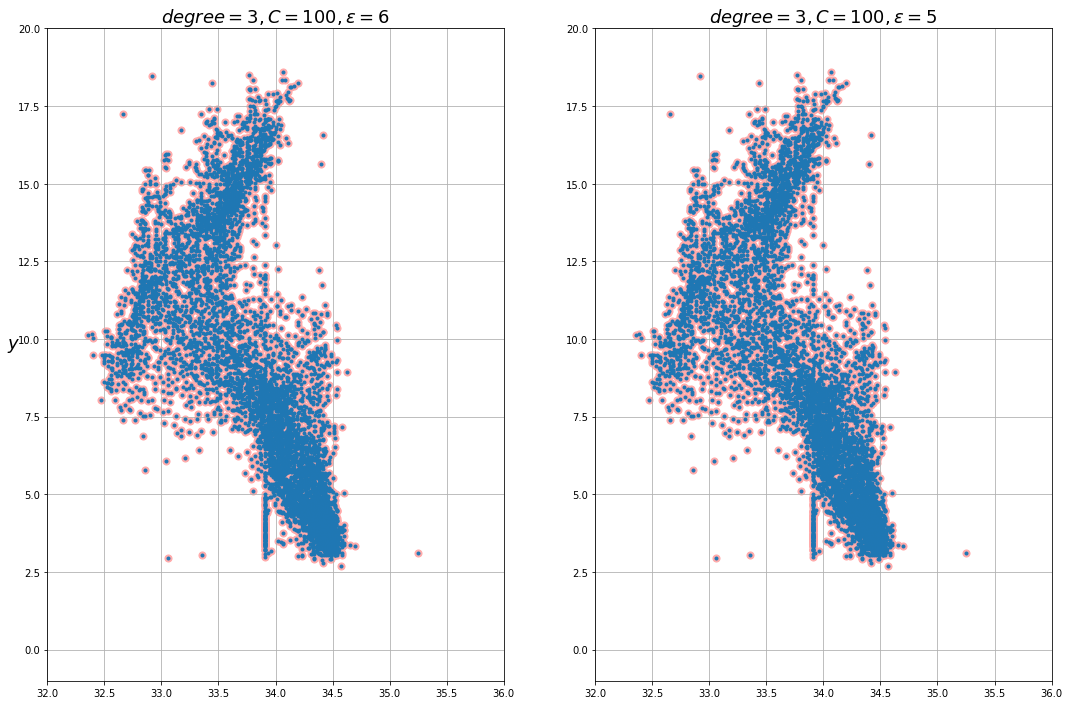

In [216]:
%matplotlib inline
def plot_svm_regression(svm_reg, X , y, axes):
    x1s= X
    y_pred= svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=3, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "c--", label='Support Vector')
    plt.plot(x1s, y_pred - svm_reg.epsilon, "c--",label='Support Vector')
    plt.scatter(X[svm_reg.support], y[svm_reg.support],s=50,
            facecolors='#FFAAAA')
    plt.plot(X, y,'.',label='Data Points')
    plt.axis(axes)
    plt.grid(True)
    

    

plt.figure(figsize=(18, 12))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X_train, y_train, [32,36,-1,20])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X_train, y_train, [32,36,-1,20])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()





### Using Grid Search for SVR

In [217]:
X_train.shape

(7500, 1)

In [218]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],
           'degree':[3],
            
           }
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [3]}


In [219]:
from sklearn.model_selection import GridSearchCV


In [220]:
grid_search=GridSearchCV(SVR(), param_grid, cv=3, return_train_score=True)

In [221]:
grid_search.fit(X_train,y_train.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [222]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 1, 'degree': 3}


In [223]:
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best cross-validation score: 0.59


-----------------

In [224]:
param_grid={'C':[1],
           'degree':[1],
            'epsilon':[i for i in range(10)],
            'gamma':[100*i for i in range(11)]
            
           }
print(param_grid)

{'C': [1], 'degree': [1], 'epsilon': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [225]:
grid_search=GridSearchCV(SVR(), param_grid, cv=3, return_train_score=True)

In [226]:
grid_search.fit(X_train,y_train.ravel())
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'degree': 1, 'epsilon': 2, 'gamma': 100}
Best cross-validation score: 0.60


In [ ]:
import mglearn

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(13,5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'epsilon':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'epsilon':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'epsilon':  np.logspace(-7, -2, 6)}

for param_grid,ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range],axes):
    grid_search = GridSearchCV(SVR(), param_grid, cv=5)
    grid_search.fit(X_train, y_train.ravel())
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='epsilon', ylabel='C', xticklabels=param_grid['epsilon'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

- Keeping the value of *epsilon* = 1.6
- Keeping the value of *C* between the range of 10 to 100.

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(13,5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}


for param_grid,ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range],axes):
    grid_search = GridSearchCV(SVR(), param_grid, cv=5)
    grid_search.fit(X_train, y_train.ravel())
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

- Keeping the value of *gamma* in range of 10 to 100

In [ ]:
param_grid={'C':[10*i for i in range(1,11)],
           'degree':[1,2,3,4,5],
            'gamma':[10*i for i in range(11)],
            'epsilon':[1.6]
            
           }
print(param_grid)

from sklearn.model_selection import GridSearchCV


grid_search=GridSearchCV(SVR(), param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train,y_train.ravel())


print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



----------------------

In [ ]:
svm_poly_reg1=SVR(kernel="poly",C=30,degree=1,epsilon=1.6,gamma=30)
svm_poly_reg2=SVR(kernel="poly",C=1,degree=1,epsilon=2,gamma=100)


svm_poly_reg1.fit(X_train, y_train.ravel())
svm_poly_reg2.fit(X_train, y_train.ravel())


svm_poly_reg1.support = find_support_vectors(svm_poly_reg1, X_train, y_train.ravel())
svm_poly_reg2.support = find_support_vectors(svm_poly_reg2, X_train, y_train.ravel())



%matplotlib inline
def plot_svm_regression(svm_reg, X , y, axes):
    x1s= X
    y_pred= svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=3, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "c--", label='Support Vector')
    plt.plot(x1s, y_pred - svm_reg.epsilon, "c--",label='Support Vector')
    plt.scatter(X[svm_reg.support], y[svm_reg.support],s=50,
            facecolors='#FFAAAA')
    plt.plot(X, y,'.',label='Data Points')
    plt.axis(axes)
    plt.grid(True)
    

    

plt.figure(figsize=(18, 12))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X_train, y_train, [32,36,-1,20])
plt.title(r"$degree={}, C={}, \epsilon = {}, \gamma= {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon,svm_poly_reg1.gamma), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X_train, y_train, [32,36,-1,20])
plt.title(r"$degree={}, C={}, \epsilon = {},\gamma= {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon,svm_poly_reg2.gamma), fontsize=18)

plt.show()

